In [113]:
# ©2023 The Johns Hopkins University Applied Physics Laboratory LLC
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from scipy.interpolate import splev,splrep

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

from tensorflow import keras
from tensorflow.keras import layers

In [114]:
model = tf.keras.models.load_model('model_exprmt', compile=True)

In [115]:
def interpolateOne(df1) -> tuple:
    x1 = np.array([])
    v1 = np.array([])
    prevV = -99999
    for i in range(len(df1)):
        if i%35==0 and df1[i] == 0:
            x1 = np.append(x1,i)
            v1 = np.append(v1,0)
            prevV = 0
        elif prevV != df1[i]:
            x1 = np.append(x1,i)
            v1 = np.append(v1,df1[i])
            prevV = df1[i]
    tck1 = splrep(x1, v1)
    vel1 = np.array([])
    for i in range(0,len(df1)):
        vel1 = np.append(vel1,splev(i, tck1))
    
    pvel1 = np.append(0,vel1)
    pvel1 = vel1[:len(df1)]
    return vel1,pvel1

In [124]:
a =pd.read_csv(r"C:\Users\yusj1\Documents\Python_Scripts\DeadReckoningTest\trail1_data.csv")

test = a.copy()

test.pop('Prev V')
test.pop('X Vel')
test.pop('Y Vel')
test.pop('Z Vel')
test.pop('Lat')
test.pop('Long')
l = test.pop('V')
prev_test = test.copy()

labelt,prevdft = interpolateOne(l)

test['Prev V'] = prevdft

test_labels = labelt[140]
test_labels = np.expand_dims(test_labels, 0)
numLabels = len(labelt)
for i in range (141, numLabels):
    temp = labelt[i]
    temp = np.expand_dims(temp,0)
    test_labels = np.concatenate((test_labels,temp))

array = test.iloc[:140].to_numpy()
numRows = len(test.index)
print(numRows)
test.drop(test.head(1).index,inplace=True)
array = np.expand_dims(array, 0)
for i in range(0, numRows-140-1):
    temp = test.iloc[:140].to_numpy()
    temp = np.expand_dims(temp,0)
    test.drop(test.head(1).index,inplace=True)
    array = np.concatenate((array,temp))
for i in range(0, numRows-140-1):
    firstValue = array[i][0][6]
    for j in range(0, 140):
        array[i][j][6] = (array[i][j][6] - firstValue)

5322


In [125]:
k = len(prev_test.index)
prev_test['Prev V'] = [0]*len(prev_test.index)

temp = prev_test

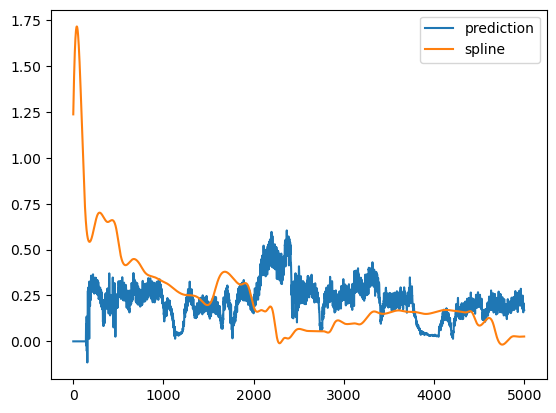

In [127]:
plt.plot(v_array[0:5000], label="prediction")
plt.plot(test_labels[0:5000], label="spline")
plt.legend()
plt.show()

In [129]:
pd.DataFrame(v_array).to_csv('trial2_predicted.csv')

2938


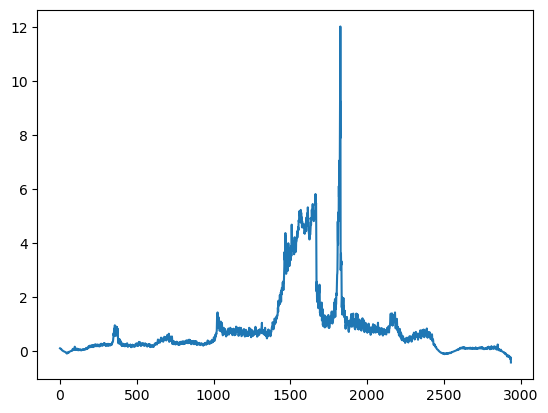

In [130]:
b = test_labels[-2938:]
print(len(b))
v_array = v_array[-2938:]
difference = b/v_array
plt.plot(difference)
# plt.show()